In [324]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import random

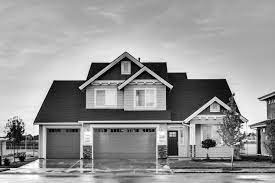

In [325]:
img = cv.imread("house.jpg", cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

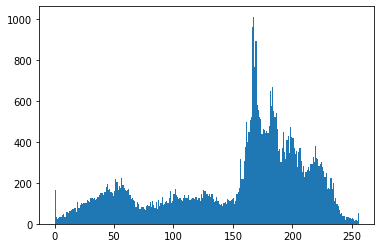

In [326]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [327]:
row , col = img.shape
row*col

50325

In [328]:
def add_noise(img):
    row , col = img.shape
    number_of_pixels = 5000
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        
        img[y_coord][x_coord] = 255
        
    number_of_pixels = 5000
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    
    return img

In [329]:
cv.imwrite('salt-and-pepper-house.jpg', add_noise(img))

True

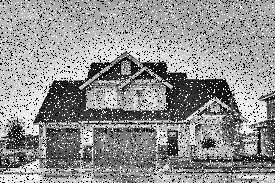

In [330]:
img_noise = cv.imread("salt-and-pepper-house.jpg", cv.IMREAD_GRAYSCALE)
cv2_imshow(img_noise)

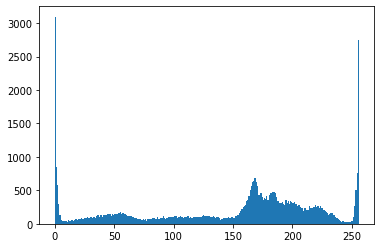

In [331]:
plt.hist(img_noise.ravel(),256,[0,256])
plt.show()

In [332]:
def mean_kernel_smoothing(img, sz):
  kernel = np.ones((sz, sz)) / (sz ** 2)
  dst = cv.filter2D(img, -1, kernel)
  plt.hist(dst.ravel(),256,[0,256])
  plt.show()
  cv2_imshow(dst)

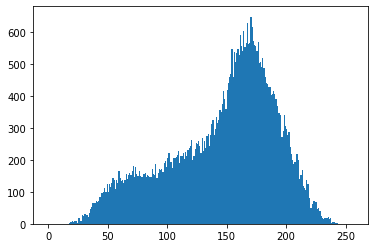

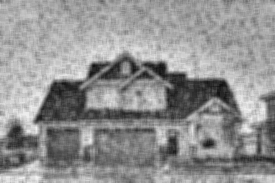

In [333]:
mean_kernel_smoothing(img_noise, 5)

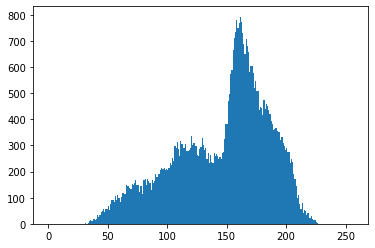

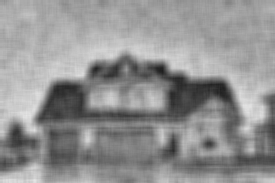

In [334]:
mean_kernel_smoothing(img_noise, 10)

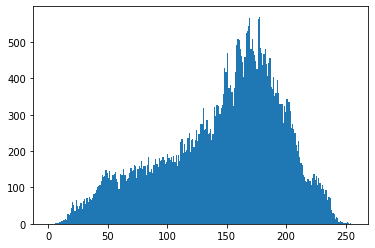

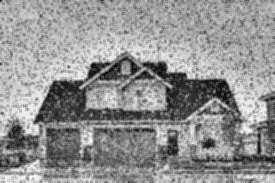

In [335]:
mean_kernel_smoothing(img_noise, 3)

In [336]:
def median_kernel_smoothing(img, sz):
  dst = cv.medianBlur(img, sz)
  plt.hist(dst.ravel(),256,[0,256])
  plt.show()
  cv2_imshow(dst)

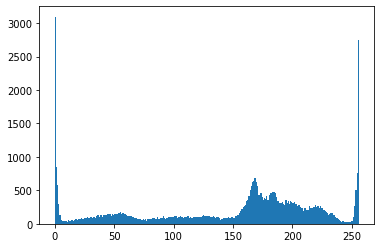

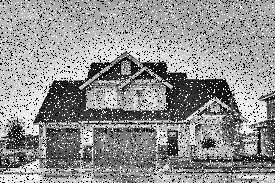

In [337]:
median_kernel_smoothing(img_noise, 1)

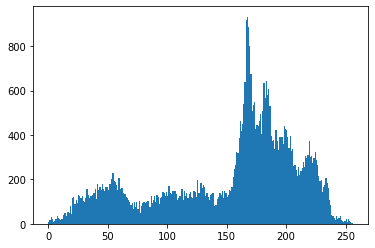

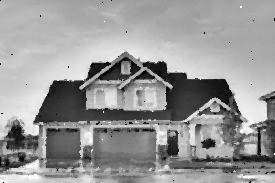

In [338]:
median_kernel_smoothing(img_noise, 3)

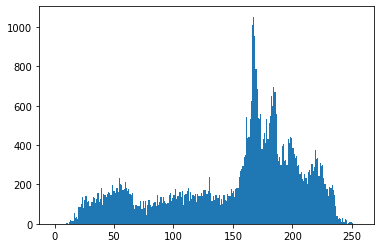

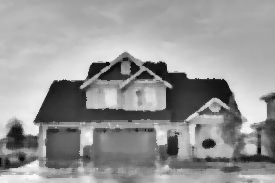

In [339]:
median_kernel_smoothing(img_noise, 5)

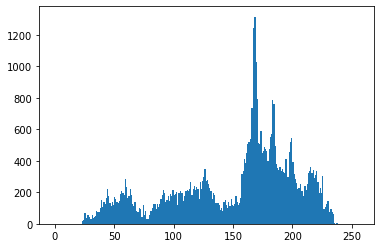

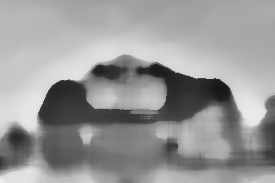

In [340]:
median_kernel_smoothing(img_noise, 19)

In [341]:
def gaussian_kernel_smoothing(img, sz, sigmaX=0):
  gaussian = cv.GaussianBlur(img, (sz, sz), sigmaX)
  plt.hist(gaussian.ravel(),256,[0,256])
  plt.show()
  cv2_imshow(gaussian)

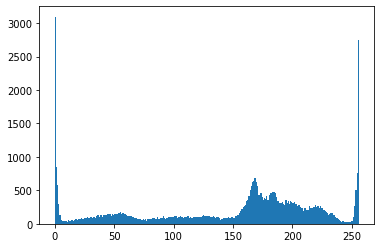

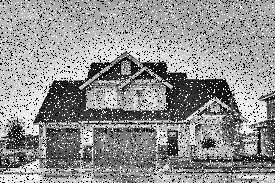

In [342]:
gaussian_kernel_smoothing(img_noise, 1)

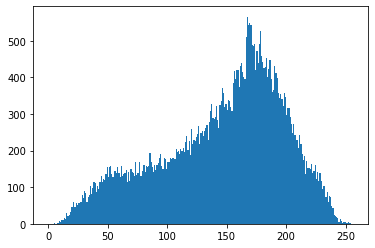

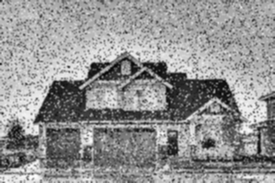

In [343]:
gaussian_kernel_smoothing(img_noise, 3)

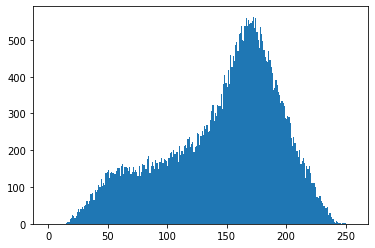

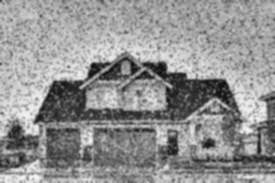

In [344]:
gaussian_kernel_smoothing(img_noise, 5)

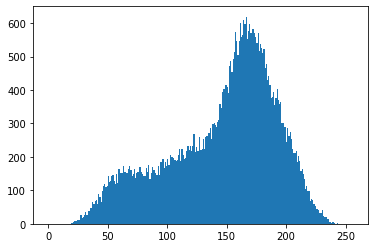

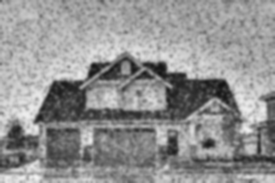

In [345]:
gaussian_kernel_smoothing(img_noise, 7)

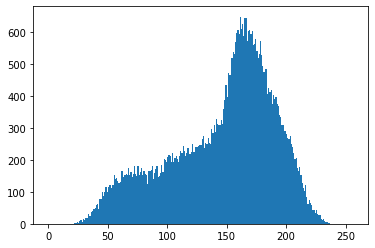

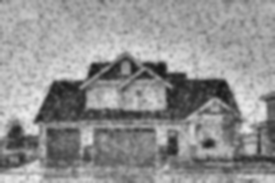

In [346]:
gaussian_kernel_smoothing(img_noise, 9)

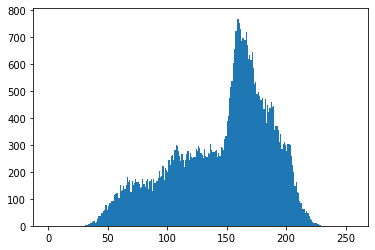

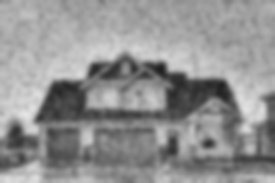

In [347]:
gaussian_kernel_smoothing(img_noise, 15)

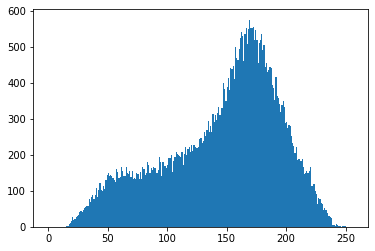

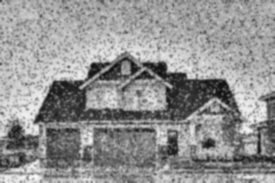

In [348]:
gaussian_kernel_smoothing(img_noise, 7, 1)

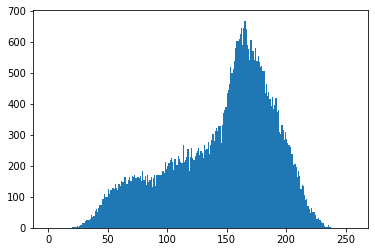

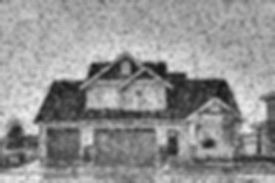

In [349]:
gaussian_kernel_smoothing(img_noise, 7, 2)

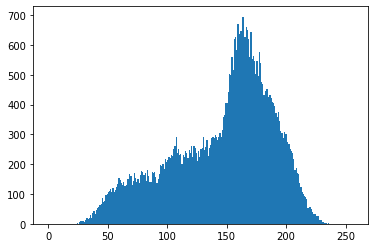

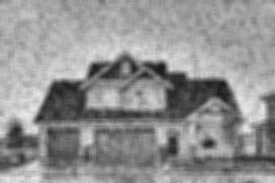

In [350]:
gaussian_kernel_smoothing(img_noise, 7, 4)

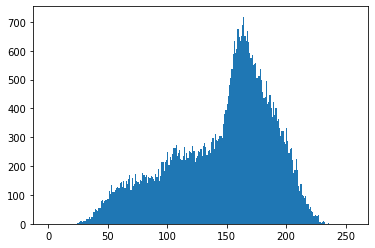

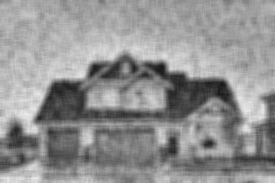

In [351]:
gaussian_kernel_smoothing(img_noise, 7, 8)

In [352]:
def add_gaussian_noise(img):
  row,col= img.shape
  mean = 0
  var = 0.01
  sigma = var**0.5
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = img + gauss
  return noisy

In [353]:
cv.imwrite('gaussian-noise-house.jpg', add_gaussian_noise(img))

True

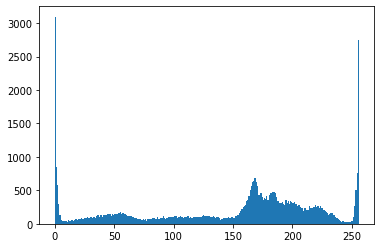

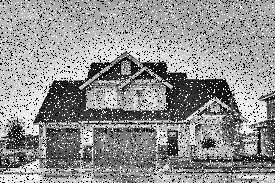

In [354]:
img_gaussian_noise = cv.imread("gaussian-noise-house.jpg", cv.IMREAD_GRAYSCALE)
plt.hist(img_gaussian_noise.ravel(),256,[0,256])
plt.show()
cv2_imshow(img_gaussian_noise)

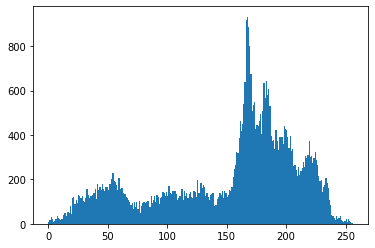

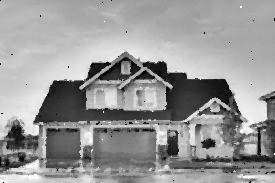

In [355]:
median_kernel_smoothing(img_gaussian_noise, 3)

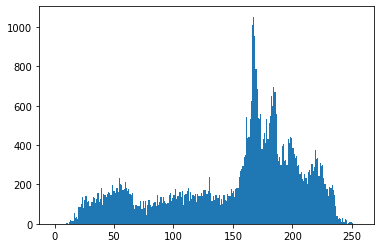

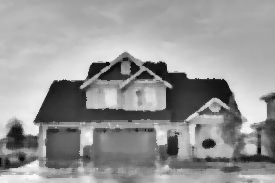

In [356]:
median_kernel_smoothing(img_gaussian_noise, 5)

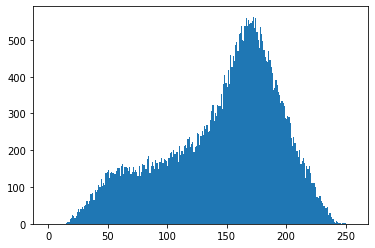

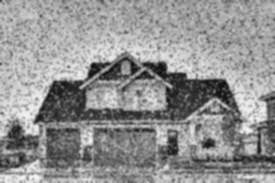

In [357]:
gaussian_kernel_smoothing(img_gaussian_noise, 5)

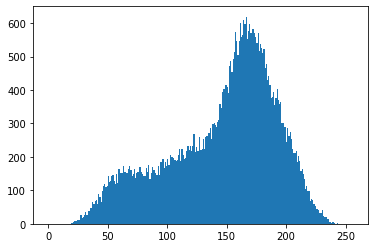

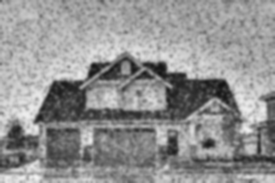

In [358]:
gaussian_kernel_smoothing(img_gaussian_noise, 7)

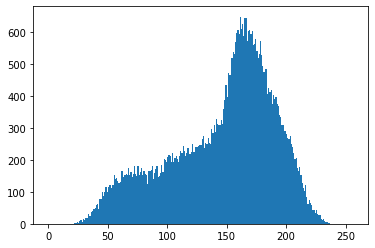

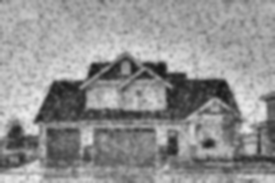

In [359]:
gaussian_kernel_smoothing(img_gaussian_noise, 9)